# AST 341 homework 2

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.6.2 (Python 3.8.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



## 1.

a. We want to compute the pressure for a gas that obeys the Maxwell-Boltzmann distribution:

\begin{equation}
4\pi p^2 n(p) dp = \frac{n_I}{(2\pi m_I kT)^{3/2}} e^{-p^2/(2m_I kT)} 4 \pi p^2 dp
\end{equation}

Our pressure integral is:
\begin{equation}
P = \frac{1}{3} \int n(p) p v d^3 p = \frac{1}{3} \int_0^{\infty} 4\pi p^2 n(p) p v dp
\end{equation}
and for a non-relativistic gas, we can take $v = p/m_I$

Define the symbols we will use&mdash;make sure we tell SymPy which are positive and real, since we have a square root in our functions

In [2]:
nI, m, k, T = symbols("n_I m_I k T", positive=True, real=True)
p = symbols("p")

Define the distribution function, $n(p)$

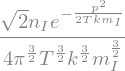

In [3]:
n = nI/(2*pi*m*k*T)**Rational(3,2) * exp(-p**2/(2*m*k*T))
n

Now do the integral.  Note we indicate $\infty$ as `oo`

In [4]:
P = Rational(1,3) * integrate(4*pi*p**2 * n * p * (p / m), (p, 0, oo))
P

Notice that we get the ideal gas law!
\begin{equation}
P = n_I k T
\end{equation}

b. Now we want to compute the energy

\begin{equation}
e = \frac{1}{\rho} \int_0^\infty 4\pi p^2 \mathcal{E}(p) n(p) dp
\end{equation}
where the kinetic energy for a single particle is just
\begin{equation}
\mathcal{E}(p) = \frac{p^2}{2 m_I}
\end{equation}
for a non-relativistic gas

In [5]:
rho = symbols("rho", positive=True)

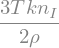

In [6]:
e = rho**-1 * integrate(4*pi*p**2 * p**2 / (2*m) * n, (p, 0, oo))
e

So
\begin{equation}
\rho e = \frac{3}{2} n_I k T
\end{equation}

This shows us that
\begin{equation}
\rho e = \frac{3}{2} P
\end{equation}
